# Analysis of ICSE Research Track Publications by Replicability & AI Use (2023 & 2024)

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Load Results
df_23 = pd.read_csv('results/bib/ICSE2023_papers.csv')
df_24 = pd.read_csv('results/bib/ICSE2024_papers.csv')

In [3]:
df_23.head()

,title,authors,url,abstract,artifact_available,artifact_reusable,artifact_functional,ai
0,Log Parsing with Prompt-Based Few-Shot Learning,"Le, Van-Hoang, Zhang, Hongyu",https://doi.org/10.1109/ICSE48619.2023.00204,Logs generated by large-scale software systems...,False,False,False,True
1,Context-Aware Bug Reproduction for Mobile Apps,"Huang, Yuchao, Wang, Junjie, Liu, Zhe, Wang, S...",https://doi.org/10.1109/ICSE48619.2023.00196,Bug reports are vital for software maintenance...,False,False,False,True
2,Vulnerability Detection with Graph Simplificat...,"Wen, Xin-Cheng, Chen, Yupan, Gao, Cuiyun, Zhan...",https://doi.org/10.1109/ICSE48619.2023.00191,Prior studies have demonstrated the effectiven...,False,False,False,False
3,DIVER: Oracle-Guided SMT Solver Testing with U...,"Kim, Jongwook, So, Sunbeom, Oh, Hakjoo",https://doi.org/10.1109/ICSE48619.2023.00187,"We present DIVER, a novel technique for effect...",True,True,False,False
4,On the Robustness of Code Generation Technique...,"Mastropaolo, Antonio, Pascarella, Luca, Guglie...",https://doi.org/10.1109/ICSE48619.2023.00181,Software engineering research has always being...,False,False,False,False


In [ ]:
def conference_overview(df, title):
    """
    Print a summary of the conference data.
    """
    print(title)
    print("------------------------")
    print(f"Total papers: {len(df)}\n")
    print(df["ai"].value_counts())
    print()
    print(df["artifact_available"].value_counts())

    papers_with_artifacts = df[df["artifact_available"]]
    print(f"\nOf {len(papers_with_artifacts)} papers with available artifacts:")
    print(f"{papers_with_artifacts['artifact_reusable'].sum()} reusable artifacts")
    print(f"{papers_with_artifacts['artifact_functional'].sum()} functional artifacts\n\n")

In [9]:
conference_overview(df_23, "Overview for ICSE 2023")
conference_overview(df_24, "Overview for ICSE 2024")

Overview for ICSE 2023
------------------------
Total papers: 211

ai
False    159
True      52
Name: count, dtype: int64

artifact_available
False    131
True      80
Name: count, dtype: int64

Of 80 papers with available artifacts:
51 reusable artifacts
13 functional artifacts


Overview for ICSE 2024
------------------------
Total papers: 238

ai
False    144
True      94
Name: count, dtype: int64

artifact_available
False    159
True      79
Name: count, dtype: int64

Of 79 papers with available artifacts:
63 reusable artifacts
2 functional artifacts




# Word Cloud of AI Abstracts

In [ ]:
def create_wordcloud_from_abstracts(df, title="Word Cloud of AI Paper Abstracts"):
    """
    Create a word cloud from abstracts of papers marked as AI-related.
    """
    # Filter for AI papers
    ai_papers = df[df["ai"] == True]
    
    # Combine all abstracts into one text
    all_abstracts = " ".join(ai_papers["abstract"].astype(str))

    # Get stopwords
    sw = set(stopwords.words('english'))
    
    # Generate word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        stopwords=sw,
        max_words=100,
        relative_scaling=0.5,
        colormap='viridis'
    ).generate(all_abstracts)
    
    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # Also return most common words for analysis
    words = re.findall(r'\b[a-zA-Z]{3,}\b', all_abstracts.lower())
    filtered_words = [word for word in words if word not in sw]
    word_freq = Counter(filtered_words)
    
    print(f"\nTop 20 most frequent words in {len(ai_papers)} AI paper abstracts:")
    for word, count in word_freq.most_common(20):
        print(f"{word}: {count}")
    
    return word_freq

ICSE 2023 AI Papers Word Cloud:
Custom stopwords:
{'this', 'will', 'study', 'does', 'and', 'through', 'could', 'by', 'must', 'myself', 'paper', 'a', 'propose', 'would', 'above', 'my', 'or', 'your', 'yours', 'have', 'use', 'from', 'may', 'ours', 'were', 'to', 'me', 'among', 'using', 'we', 'on', 'into', 'i', 'can', 'up', 'show', 'should', 'being', 'these', 'during', 'of', 'had', 'the', 'between', 'at', 'that', 'ourselves', 'is', 'was', 'software', 'research', 'after', 'you', 'those', 'our', 'in', 'method', 'has', 'do', 'did', 'be', 'present', 'about', 'are', 'with', 'but', 'below', 'been', 'might', 'shall', 'for', 'approach', 'results', 'before', 'used'}
nltk stopwords:
{'their', "he'd", "we're", 'again', 'by', 'himself', 'themselves', 'then', "we've", 'if', 'my', 'yourself', 'needn', 'ours', 'further', 'll', 'once', 'were', 'own', "isn't", 'it', 'into', 'why', "doesn't", 'some', 'all', 'these', 'had', "i've", 'the', 'where', 'at', "don't", 'that', 'is', 'doing', "couldn't", 'our', 're',

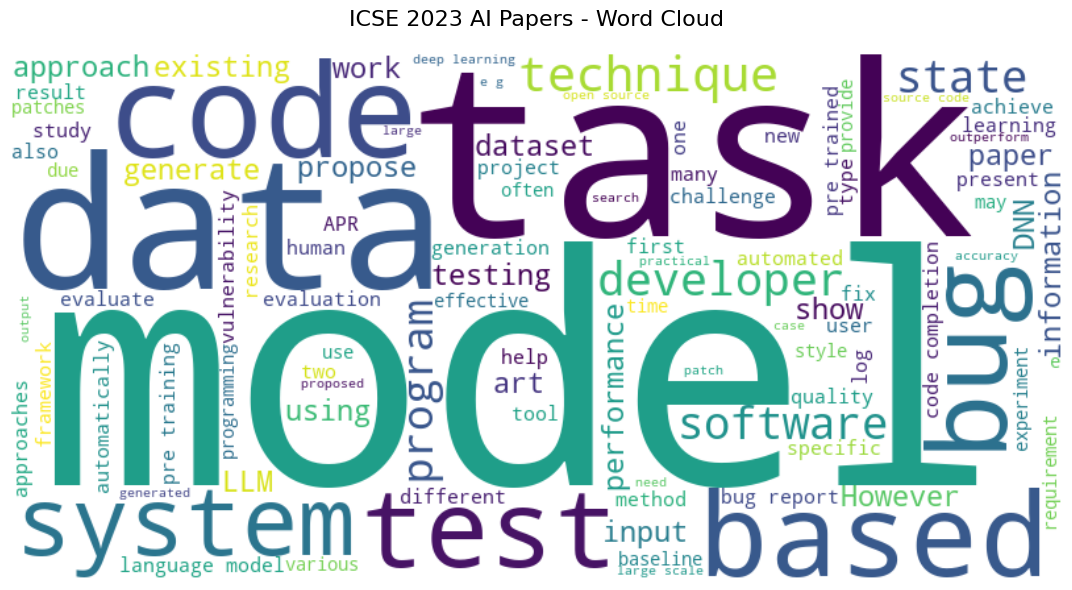

TypeError: argument of type 'WordListCorpusReader' is not iterable

In [27]:
# Create word clouds for both years
print("ICSE 2023 AI Papers Word Cloud:")
freq_2023 = create_wordcloud_from_abstracts(df_23, "ICSE 2023 AI Papers - Word Cloud")

ICSE 2024 AI Papers Word Cloud:


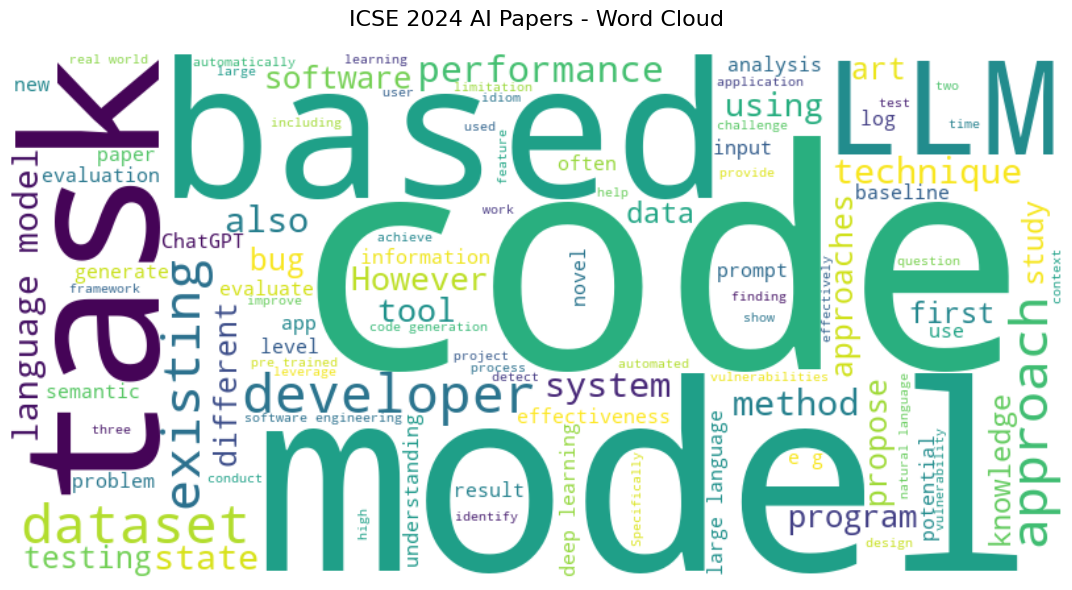

TypeError: argument of type 'WordListCorpusReader' is not iterable

In [22]:
print("ICSE 2024 AI Papers Word Cloud:")
freq_2024 = create_wordcloud_from_abstracts(df_24, "ICSE 2024 AI Papers - Word Cloud")